In [6]:
import numpy as np
import pandas as pd
import histMatch, glob
np.random.seed(1006)
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams["figure.figsize"] = 30,10
import sys, cv2
from scipy import stats
sys.path.insert(0,"/home/msmith/misc/mcmc/")
import mcmc
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

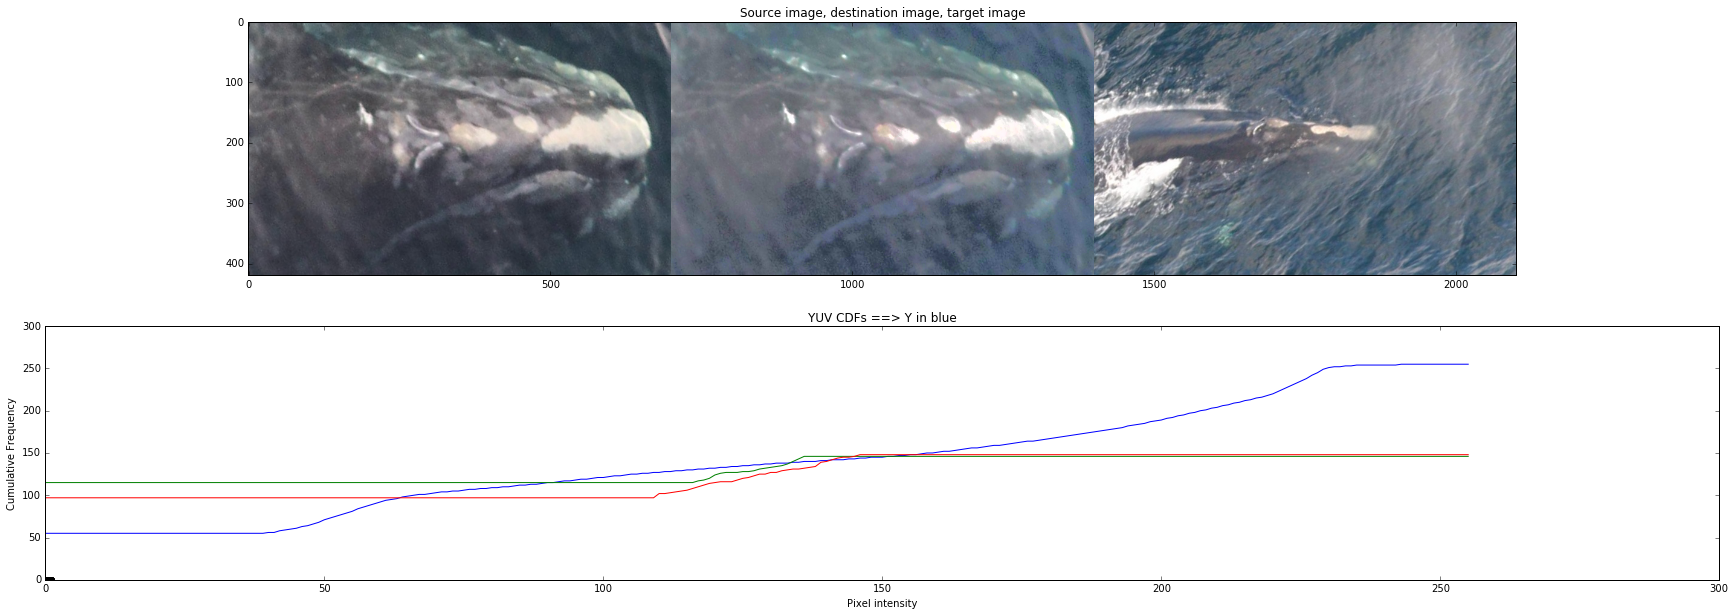

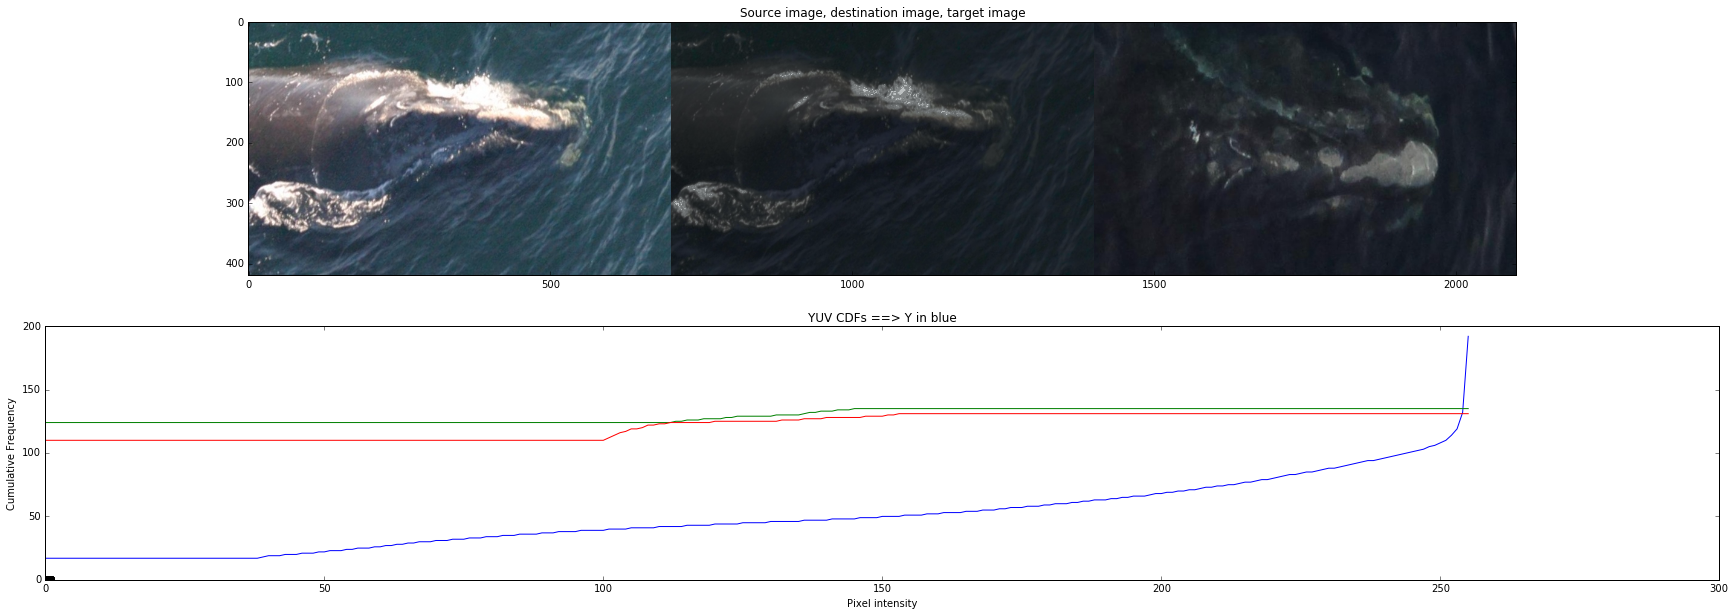

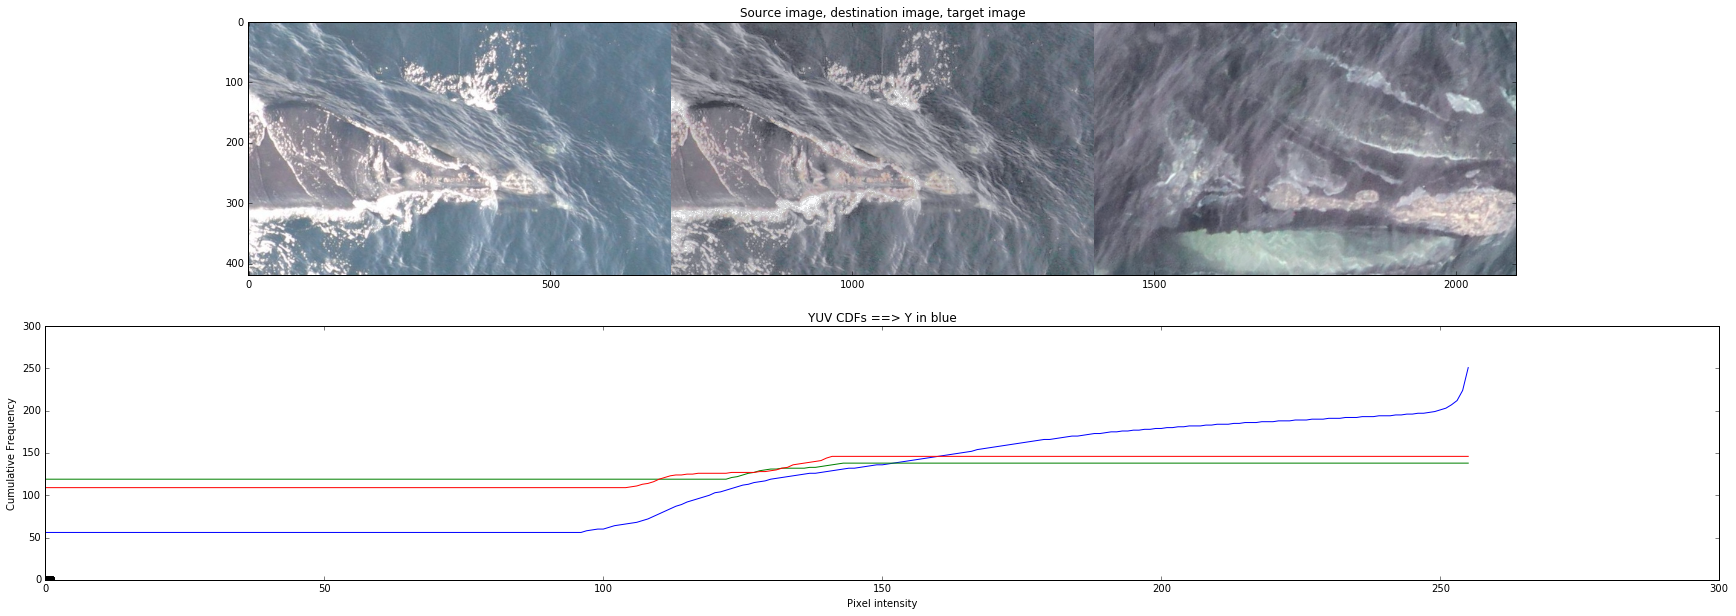

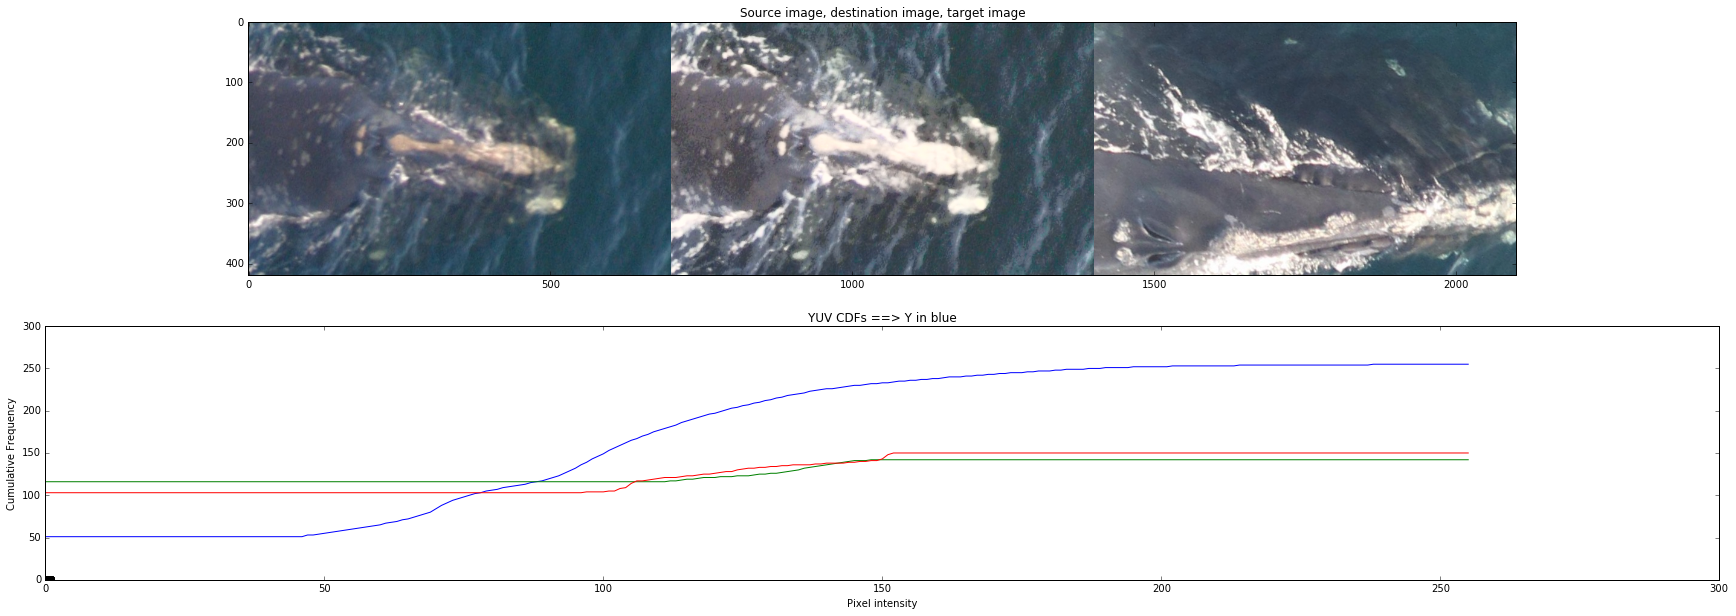

In [63]:
# Main model
def density(sample,x):
    t1, t2, t3, t4 = sample
    return t1*np.tanh(((x-t2)/t3)) + t4


# Get some data of x and f(x) the mapping of cdf function
headPaths = glob.glob("../imgs/*/head*")
nPairs = 20
D = np.zeros((nPairs,256))
x = np.arange(256)
x = x/255.0
fig = plt.figure()
for i in range(nPairs):
    img1, img2 = cv2.imread(headPaths[i]), cv2.imread(headPaths[i+1])
    dst, mappings = histMatch.getDst(img1=img1,img2=img2)
    fx = mappings[0]
    D[i] = fx/255.0
    def show():
        plt.subplot(211)
        plt.title("Source image, destination image, target image")
        plt.imshow(np.hstack((img1,dst,img2)))
        plt.subplot(212)
        for i in range(3):
            plt.plot(np.arange(256),mappings[i],alpha=1)
            plt.xlabel("Pixel intensity")
            plt.ylabel("Cumulative Frequency")
            plt.title("YUV CDFs ==> Y in blue")
        plt.plot(x,D[i],"o",c="black")
        plt.show()
    if i % 5 == 0:
        show()
    
init_theta = np.array([ 1.20424783,  0.84479147,  1.13448632,  0.86328334])

In [54]:
weights = pd.read_csv("weights/weights.csv")
weights = weights.drop([weights.columns[0]],1)
weights.head()

,0,1,2,3
0,1.175655,0.823318,1.055066,0.956700
1,0.881341,1.132801,0.756580,1.130395
2,0.988766,0.954030,1.203341,0.914852
3,1.127560,0.931856,1.115938,0.918194
4,1.204248,0.844791,1.134486,0.863283


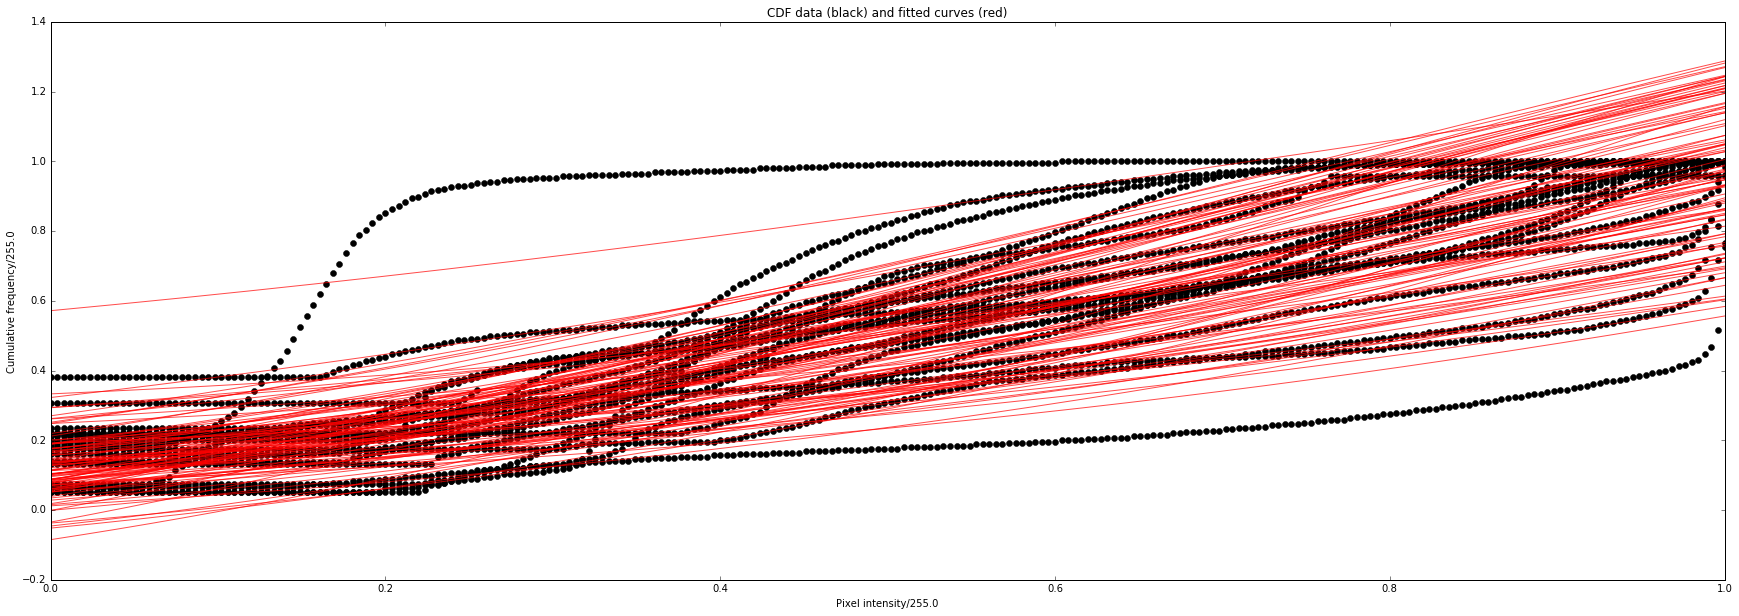

In [65]:
for i in range(nPairs):
    plt.plot(x,D[i],"o",c="black")

for i in range(100):
    plt.plot(x,density(np.array(weights.iloc[i]),x),c="red",alpha=0.7)
    
plt.title("CDF data (black) and fitted curves (red)")
plt.xlabel("Pixel intensity/255.0")
plt.ylabel("Cumulative frequency/255.0")